In [313]:
import os
import sys
import json
import torch
import argparse
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from torch.nn import MSELoss
from torchsummary import summary
import matplotlib.pyplot as plt
from model_dev.expirement import ExpMain
from model_dev.dataloader import data_provider
from model_dev.stock_picker import StockPicker
from model_dev.visualize.visualize_single import Visualize, craete_heatmap
from model_dev.visualize.scatter_plot import Scatter
from model_dev.utills import read_default_args, load_model, get_stock_meta, get_stock_heatmap_matrix

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DLinear

In [314]:
default_args = read_default_args()

In [315]:
config_file = '../../configs/config_shiva.json'
config = json.load(open(config_file))
data_dir = config['data_dir']
raw_dir = "{}/{}".format(data_dir, config['raw_data_dir'])
csv_dir = "{}/{}".format(data_dir, config['raw_data_csv'])
ltsf = "{}/ltsf".format(data_dir)

In [316]:
s

[(145, 0.0003),
 (103, 0.0004),
 (175, 0.0004),
 (30, 0.0006),
 (190, 0.0007),
 (287, 0.0009),
 (267, 0.0009),
 (148, 0.001),
 (326, 0.001),
 (87, 0.001),
 (90, 0.001),
 (28, 0.0011),
 (112, 0.0012),
 (191, 0.0013),
 (173, 0.0014),
 (51, 0.0015),
 (174, 0.0015),
 (232, 0.0016),
 (196, 0.0016),
 (206, 0.0016),
 (91, 0.0017),
 (53, 0.0017),
 (85, 0.0018),
 (237, 0.0018),
 (220, 0.0019),
 (161, 0.0019),
 (361, 0.0021),
 (387, 0.0022),
 (102, 0.0022),
 (96, 0.0022),
 (18, 0.0022),
 (304, 0.0022),
 (384, 0.0022),
 (349, 0.0022),
 (64, 0.0023),
 (88, 0.0025),
 (44, 0.0025),
 (106, 0.0025),
 (260, 0.0025),
 (132, 0.0027),
 (67, 0.0028),
 (157, 0.0028),
 (300, 0.0028),
 (0, 0.0029),
 (99, 0.0029),
 (244, 0.003),
 (150, 0.003),
 (238, 0.0031),
 (29, 0.0032),
 (323, 0.0032),
 (297, 0.0033),
 (143, 0.0033),
 (312, 0.0035),
 (351, 0.0036),
 (224, 0.0037),
 (311, 0.0038),
 (211, 0.0038),
 (38, 0.0038),
 (338, 0.0039),
 (286, 0.004),
 (249, 0.0041),
 (382, 0.0044),
 (117, 0.0044),
 (23, 0.0044),
 (3

In [320]:
common_stock_map[175]

[128, 136, 205, 13, 239, 336, 112, 179, 373, 376]

In [318]:
args = {
   'root_path': ltsf,
   'checkpoints': '{}/checkpoints/'.format(data_dir),
   'data_path': '03_23.csv',
   'seq_len': 120,
   'pred_len': 30,
   'batch_size': 16,
   'learning_rate': 0.05,
   'train_only': False,
   'train_epochs': 20,
   'data_segment': None,
   'model': 'nlinear_attention',
   'enc_in': 12,
   'patience': 5,
   'target': 0,
   'stocks': [175, 128, 136, 205, 13, 239, 336, 112, 179, 373, 376]
}

for key, value in args.items():
    default_args[key] = value

args = argparse.Namespace(**default_args)
setting = 'mod_{}_sl{}_pl{}_ds_{}_tg_{}_ch_{}_corr_k50'.format(args.model, args.seq_len, args.pred_len, args.data_path.split('.')[0], 175, args.enc_in)

weights = os.listdir("{}/{}".format(args.checkpoints, setting))
sorted_weights = sorted(weights, key=lambda x: float(x.replace('checkpoint_','').replace('.pth','')), reverse=True)
sorted_weights

['checkpoint_0.0085.pth', 'checkpoint_0.0011.pth', 'checkpoint_0.0004.pth']

In [319]:
vis = Visualize(args, mode='val', setting=setting, weights=sorted_weights[-1], title_meta=1, decision_log=0)
loss_list, preds, trues = [], [], []
print(names[args.stocks[0]])
for ts in tqdm(range(0, 5000, 30)):
    pred, true, loss = vis.plot(ts, plot=1, plt_len=None, normalize=True)
    preds.append(pred)
    trues.append(true)
    loss_list.append(loss)

Load model from /Users/shiva/Desktop/data_maestro//checkpoints/mod_nlinear_attention_sl120_pl30_ds_03_23_tg_103_ch_12_corr_k50/checkpoint_0.0004.pth


KeyboardInterrupt: 

## Visualize pertervations

Load model from /Users/shiva/Desktop/data_maestro//checkpoints/mod_nlinear_attention_sl120_pl30_ds_03_23_tg_145_ch_11_corr_k50/checkpoint_0.0003.pth
Original data shape: (14250, 12)
Data shape after inter-day:  8550
test 1681


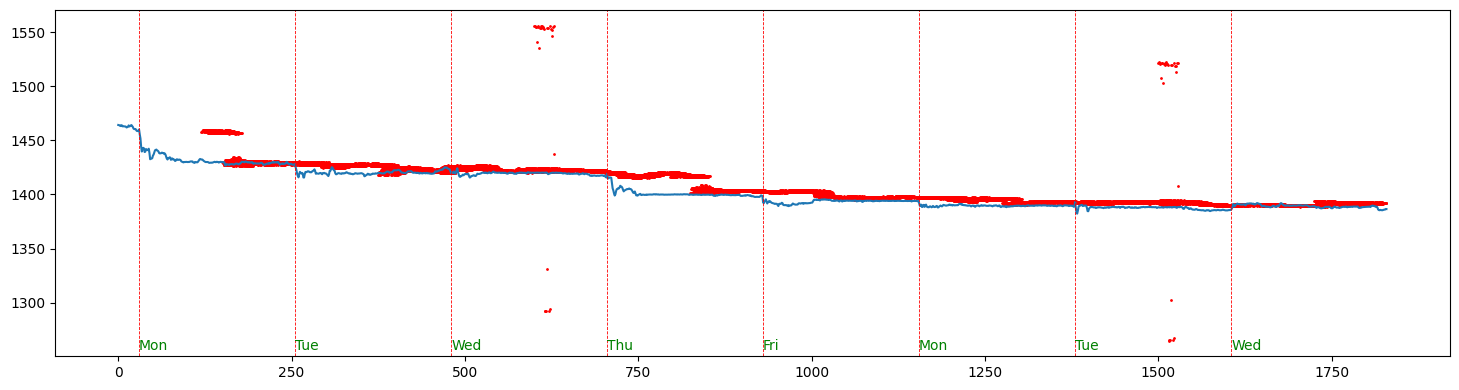

In [ ]:
scatter = Scatter(args, setting, sorted_weights[-1], mode='test')
scatter.plot(segment=None) ; plt.show()

In [ ]:
args = {
   'root_path': ltsf,
   'checkpoints': '{}/checkpoints/'.format(data_dir),
   'data_path': '03_23.csv',
   'seq_len': 120,
   'pred_len': 30,
   'batch_size': 16,
   'learning_rate': 0.05,
   'train_only': False,
   'train_epochs': 20,
   'data_segment': None,
   'model': 'nlinear_attention',
   'enc_in': 397,
   'patience': 5,
   'target': 38,
   'stocks': None
}

for key, value in args.items():
    default_args[key] = value
args = argparse.Namespace(**default_args)
setting = 'mod_{}_sl{}_pl{}_ds_{}_tg_{}_ch_{}_test'.format(args.model, args.seq_len, args.pred_len, args.data_path.split('.')[0], args.target, args.enc_in)
weights = os.listdir("{}/{}".format(args.checkpoints, setting))
sorted_weights = sorted(weights, key=lambda x: float(x.replace('checkpoint_','').replace('.pth','')), reverse=True)
model = load_model(args)
model.load_state_dict(torch.load("{}/{}/{}".format(args.checkpoints, setting, sorted_weights[-1])))
attn_weights = model.Attention.weight.cpu().detach().numpy().copy()
sorted_weights[-1]

'checkpoint_0.0251.pth'

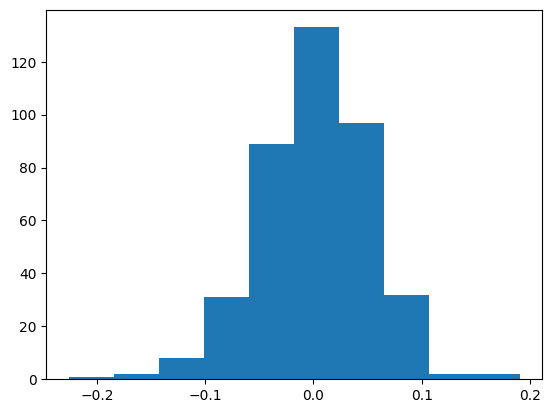

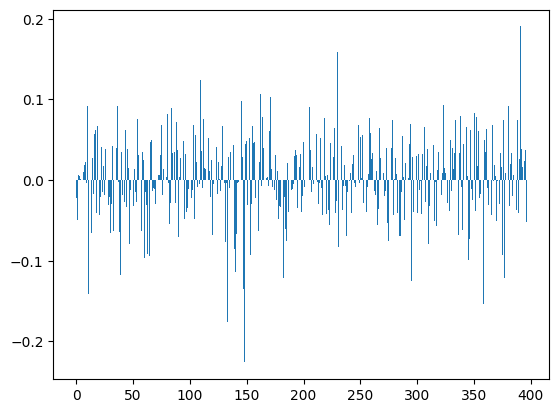

In [ ]:
plt.hist(attn_weights[0]) ; plt.show()
plt.bar(np.arange(397), attn_weights[0]) ; plt.show()

In [ ]:
stocks = [i for i in range(len(attn_weights[0])) if abs(attn_weights[0][i])>0.15]
sorted(stocks)

[133, 148, 230, 358, 391]

In [ ]:
# sort attn_weights_test preserving index
a = np.array(abs(attn_weights_test[0])).argsort()[::-1]
a[:10]

array([138, 149, 159,  12, 357, 297, 152, 195,  98, 177])

In [ ]:
# sort attn_weights_test preserving index
a = np.array(abs(attn_weights[0])).argsort()[::-1]
a[:10]

array([148,  82, 201, 105,   7, 203,  20,  26, 281, 314])

In [ ]:
stocks = [i for i in range(len(attn_weights_test[0])) if abs(attn_weights_test[0][i])>0.15]
sorted(stocks)

[74, 206, 270]

In [ ]:
attn_weights_test[0][:5], attn_weights[0][:5]

(array([ 0.06986644, -0.01674734,  0.04850215, -0.03687299, -0.01129768],
       dtype=float32),
 array([ 0.06986644, -0.01674734,  0.04850215, -0.03687299, -0.01129768],
       dtype=float32))

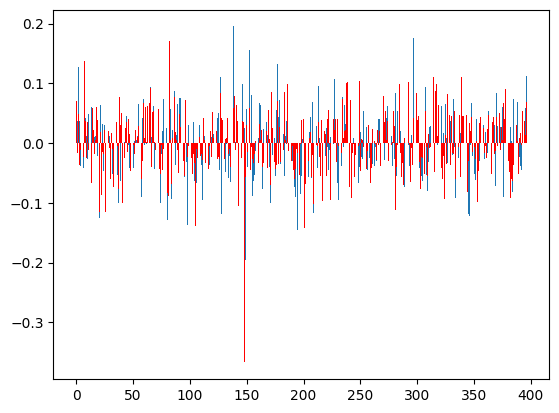

'checkpoint_0.2812.pth'

In [ ]:
model.load_state_dict(torch.load("{}/{}/{}".format(args.checkpoints, setting, sorted_weights[0])))
attn_weights_test = model.Attention.weight.cpu().detach().numpy()
# plt.hist(attn_weights_test[0]) ; plt.show()
plt.bar(np.arange(397), attn_weights_test[0]) ;plt.bar(np.arange(397), attn_weights[0], color='red') ; plt.show()
sorted_weights[-3]

In [ ]:
args = {
   'root_path': ltsf,
   'checkpoints': '{}/checkpoints/'.format(data_dir),
   'data_path': '03_23.csv',
   'seq_len': 120,
   'pred_len': 30,
   'batch_size': 16,
   'learning_rate': 0.05,
   'train_only': False,
   'train_epochs': 20,
   'data_segment': None,
   'model': 'nlinear_attention',
   'enc_in': 11,
   'patience': 5,
   'target': 0,
   'stocks': [145, 258, 327, 8, 103, 231, 148, 118, 247, 345, 351]
}

for key, value in args.items():
    default_args[key] = value
args = argparse.Namespace(**default_args)


print("\n-------------Training for target {}-------------\n".format(args.target))
exp = ExpMain(args)
setting = 'mod_{}_sl{}_pl{}_ds_{}_tg_{}_ch_{}_corr_k50'.format(args.model, args.seq_len, args.pred_len, args.data_path.split('.')[0], args.target, args.enc_in)
exp.train(setting)


-------------Training for target 0-------------

Use CPU
Total number of parameters is: 3642
Original data shape: (14250, 12)
Data shape after inter-day:  8550
train 5836
Original data shape: (14250, 12)
Data shape after inter-day:  8550
val 826


  0%|          | 0/364 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
from models.nlinear_attention import Model

args = {
   'root_path': ltsf,
   'checkpoints': '{}/checkpoints/'.format(data_dir),
   'data_path': '03_23.csv',
   'seq_len': 120,
   'pred_len': 30,
   'batch_size': 16,
   'learning_rate': 0.05,
   'train_only': False,
   'train_epochs': 20,
   'data_segment': None,
   'model': 'nlinear_attention',
   'enc_in': 397,
   'patience': 5,
   'target': 0,
   'stocks': None
}

for key, value in args.items():
    default_args[key] = value
args = argparse.Namespace(**default_args)

model = Model(args)


In [ ]:
stock_heatmap_matrix = get_stock_heatmap_matrix(model, 397, args)
stock_heatmap_matrix_2 = get_stock_heatmap_matrix(model, 397, args, setting_suffix='_2')

In [ ]:
names[]

'BOROSIL RENEWABLES'

In [ ]:
a = get_stock_meta("{}/instruments.json".format(ltsf), "{}/03_23.csv".format(ltsf))
names = []
for k, v in a.items():
    names.append(v['name'])

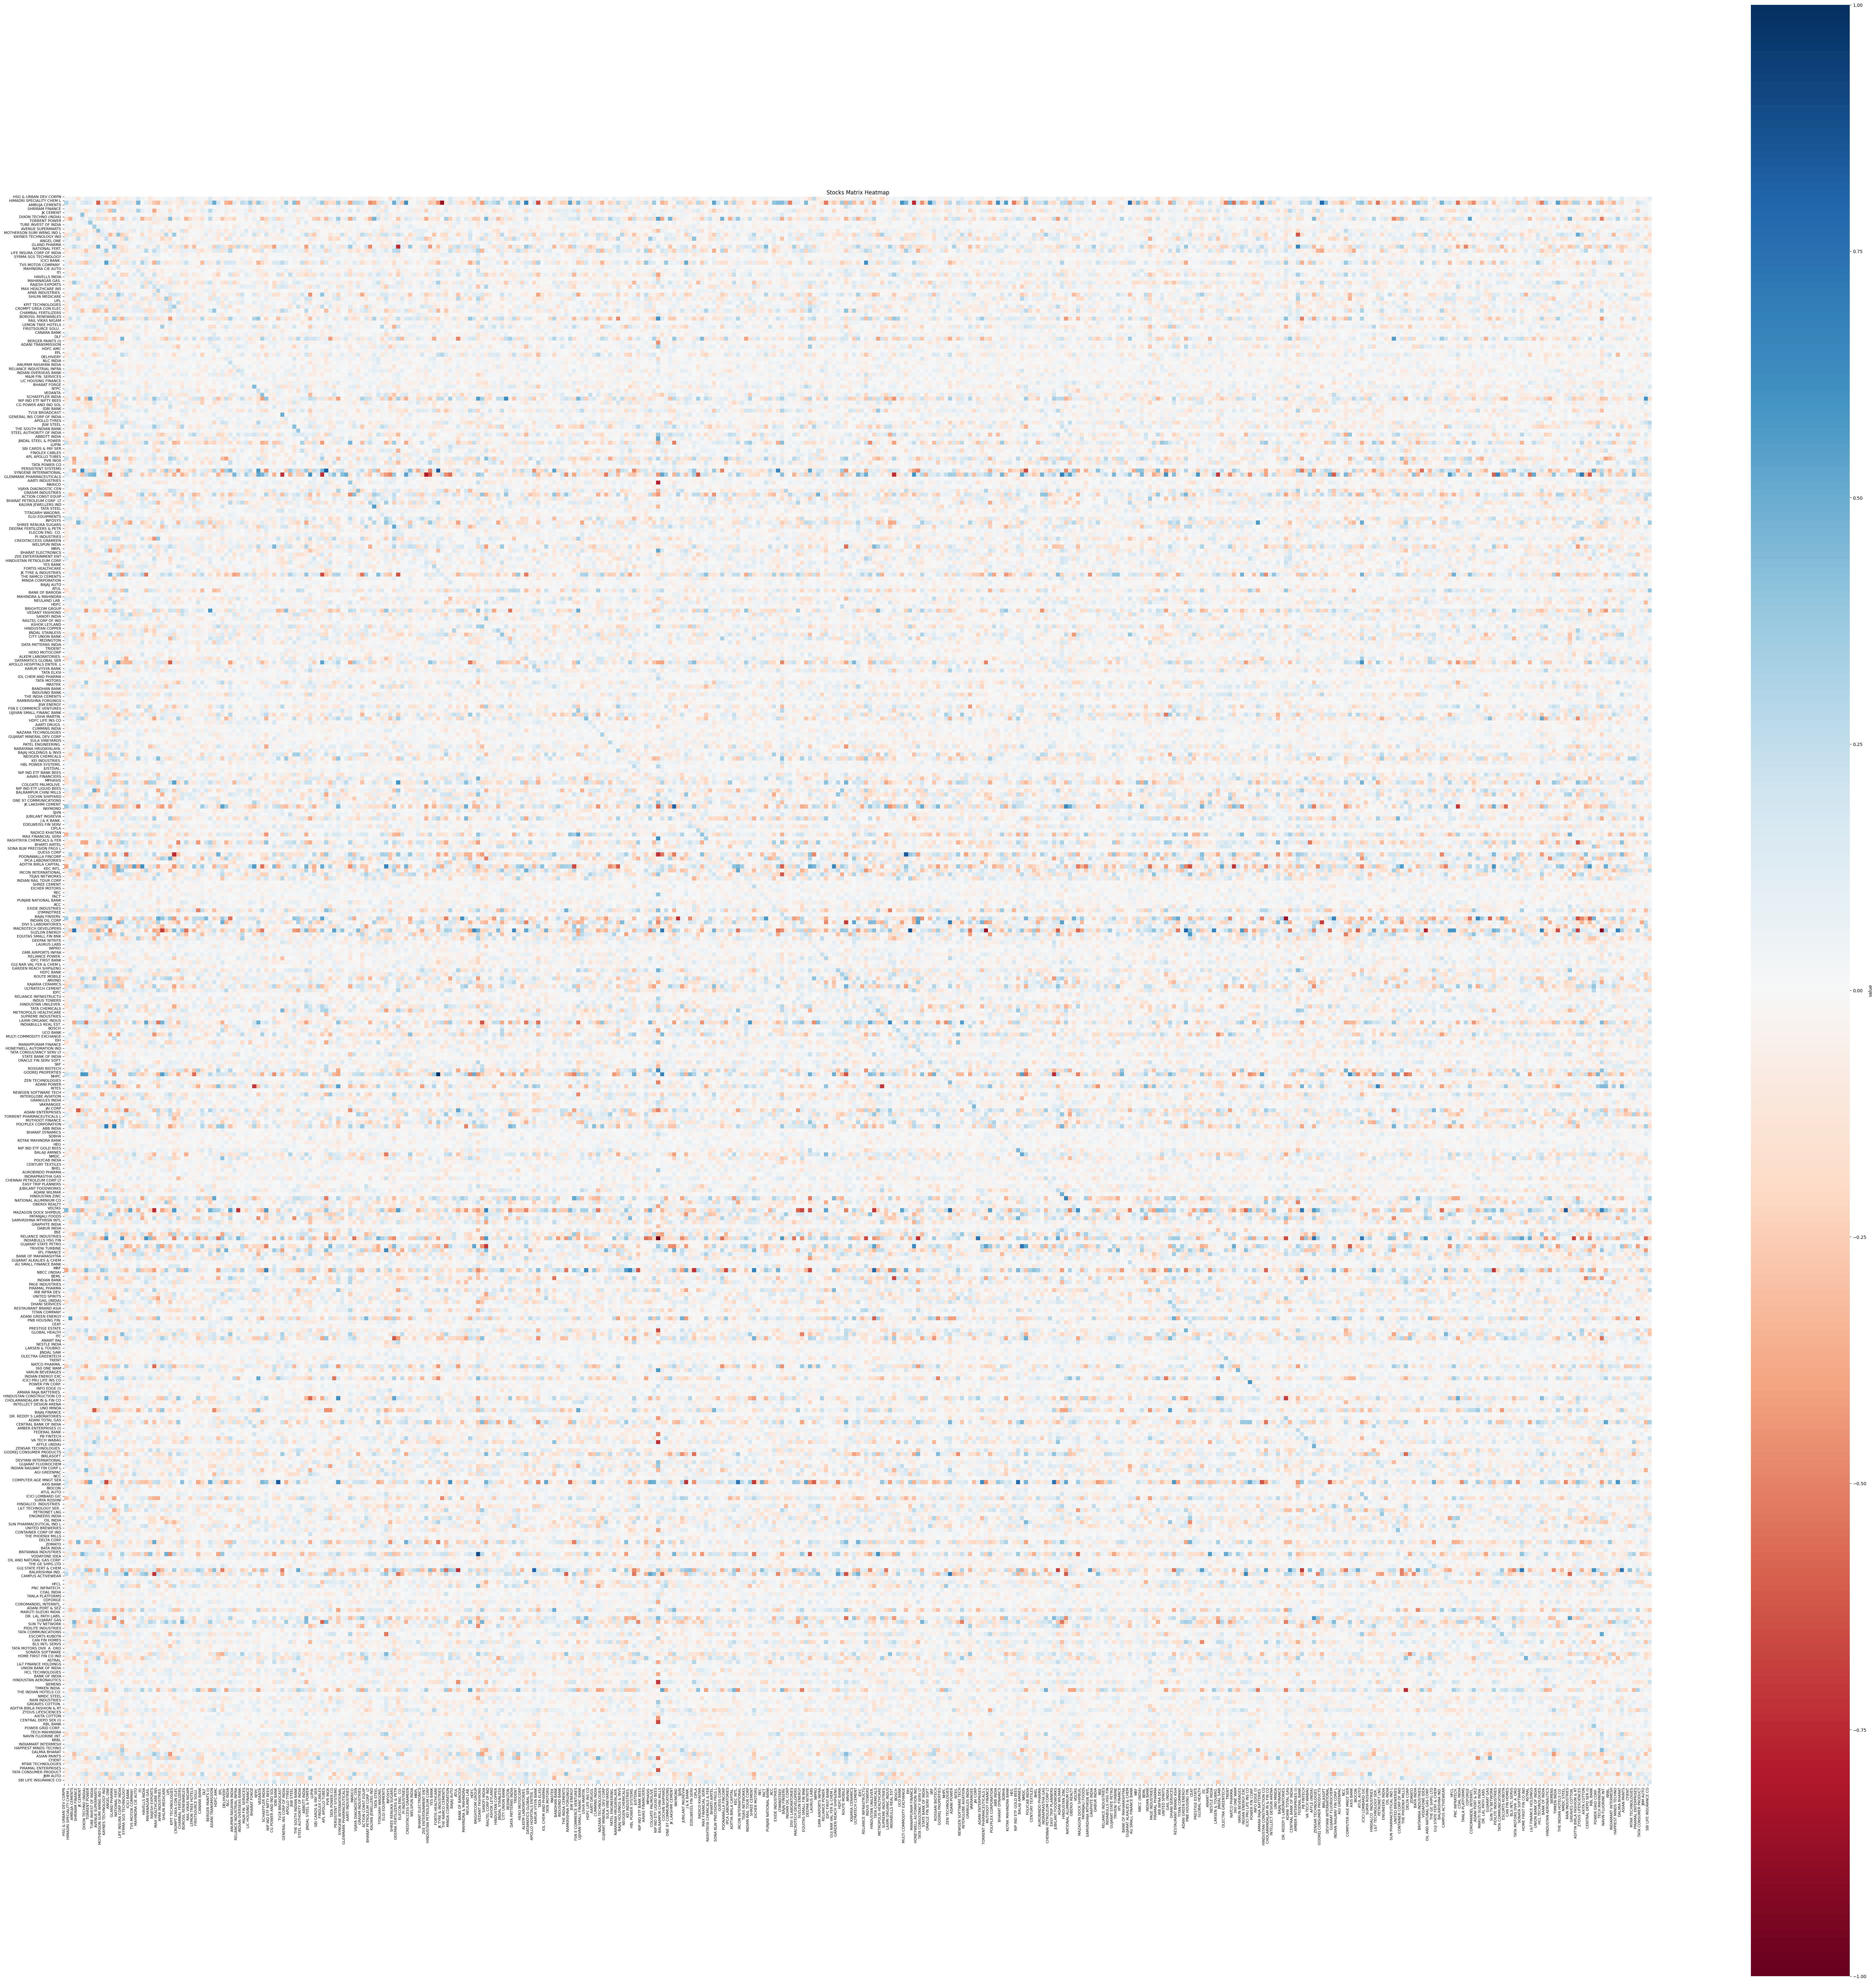

In [ ]:
craete_heatmap(stock_heatmap_matrix, names)

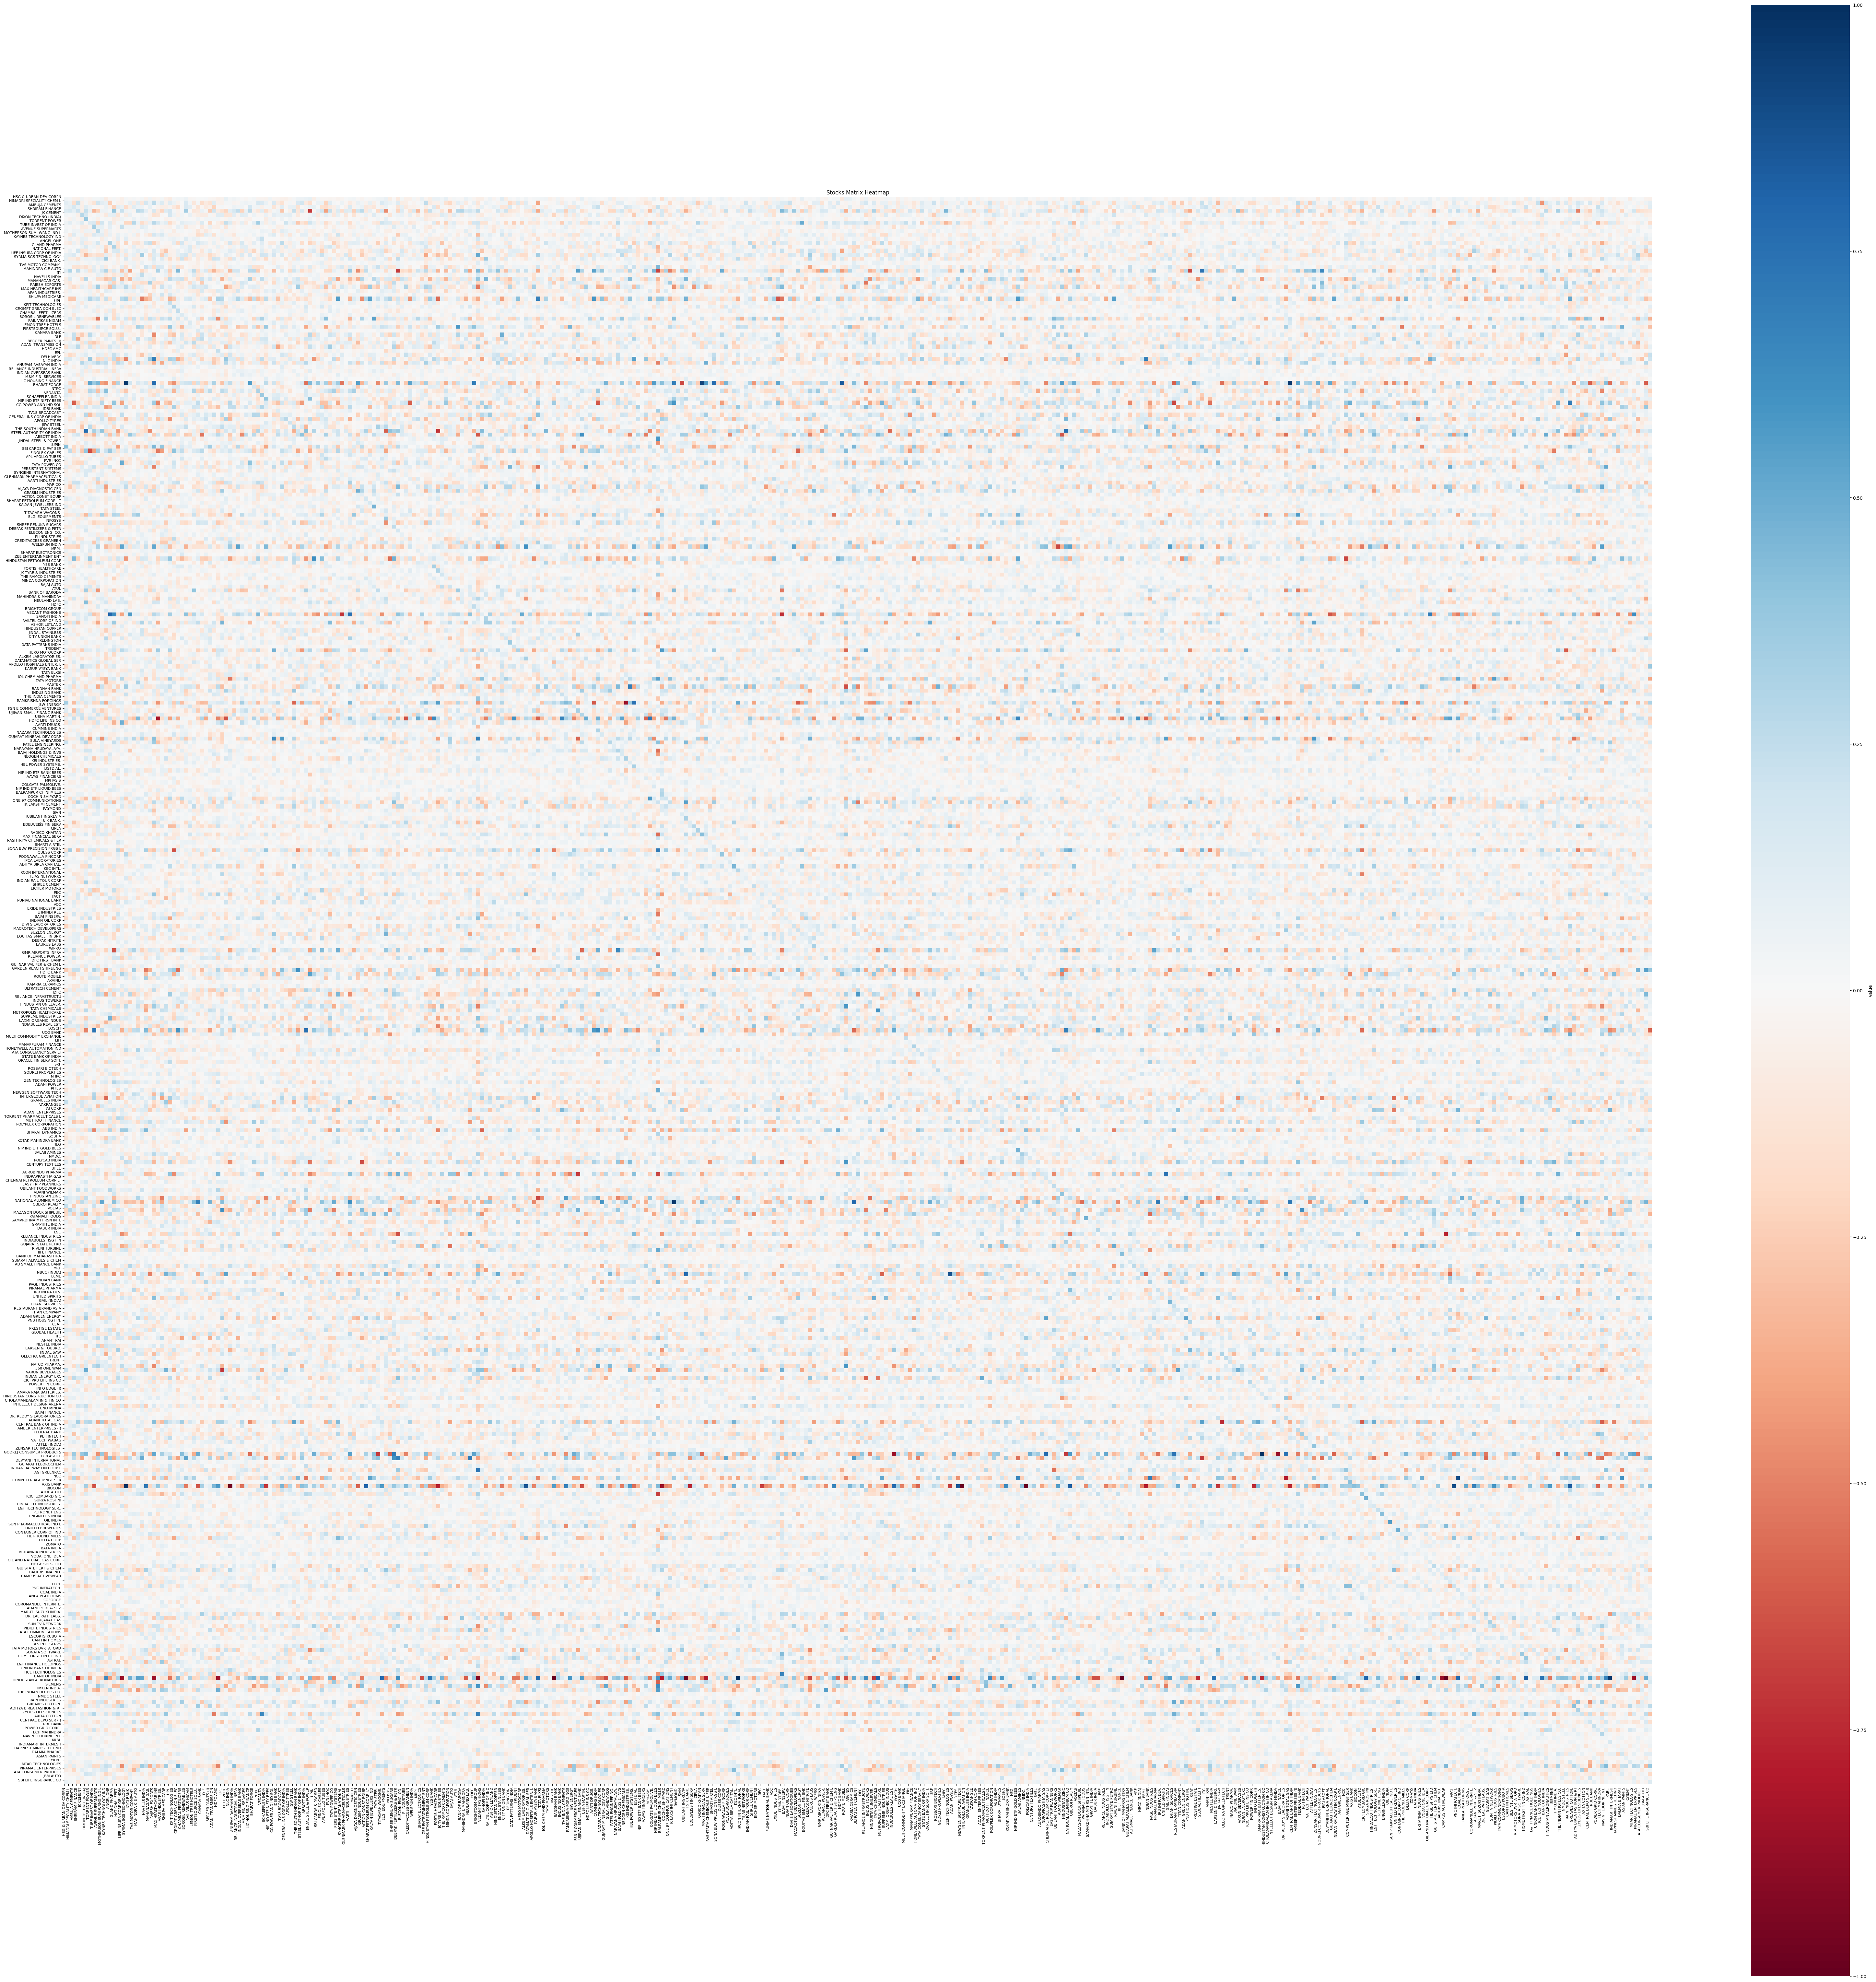

In [ ]:
craete_heatmap(stock_heatmap_matrix_2, names)

In [ ]:
# args sort each stock in axis0 by taking abs first
a = np.argsort(abs(stock_heatmap_matrix), axis=1)[:, ::-1].tolist()
b = np.argsort(abs(stock_heatmap_matrix_2), axis=1)[:, ::-1].tolist()

In [ ]:
k=50
common_stock_map = {}
for i in range(397):
    common = set(a[i][:k]).intersection(set(b[i][:k]))
    common_stock_map[i] = list(common)

correlated_stocks_path = "{}/correlated_stock_map_k{}.json".format(ltsf, k)
json.dump(common_stock_map, open(correlated_stocks_path, 'w'), indent=4)
correlated_stocks_path

'/Users/shiva/Desktop/data_maestro//ltsf/correlated_stock_map_k50.json'

In [ ]:
common_stock_map[145], names[145]

([258, 327, 8, 103, 231, 148, 118, 247, 345, 351], 'AAVAS FINANCIERS')

In [ ]:
l = []
for i in common_stock_map:
    l.append(len(i[1]))
    print(i[0], names[i[0]], len(i[1]), i[1])

276 GAIL (INDIA) 17 {0, 98, 132, 376, 198, 167, 103, 104, 145, 305, 306, 276, 189, 248, 89, 61, 95}
4 JK CEMENT 15 {131, 4, 40, 314, 142, 239, 305, 81, 308, 149, 22, 217, 26, 125, 94}
332 SUN PHARMACEUTICAL IND L 15 {130, 291, 266, 298, 74, 238, 335, 112, 19, 308, 339, 281, 347, 220, 221}
26 UPL 14 {193, 90, 38, 39, 186, 229, 103, 282, 140, 379, 57, 26, 315, 61}
102 HDFC 14 {65, 386, 194, 324, 223, 101, 102, 16, 339, 149, 245, 252, 382, 319}
132 AARTI DRUGS. 14 {194, 99, 324, 135, 329, 172, 238, 82, 148, 308, 312, 218, 380, 29}
133 CUMMINS INDIA 14 {288, 66, 133, 230, 297, 233, 139, 368, 308, 340, 23, 122, 91, 381}
143 JUSTDIAL. 14 {64, 5, 392, 201, 140, 332, 272, 305, 83, 20, 149, 183, 26, 155}
196 ARVIND 14 {384, 382, 4, 292, 37, 101, 12, 141, 142, 300, 80, 240, 253, 190}
267 AU SMALL FINANCE BANK 14 {5, 134, 327, 90, 103, 267, 80, 115, 309, 311, 346, 379, 221, 382}
361 CAN FIN HOMES 14 {128, 288, 312, 194, 101, 71, 136, 200, 104, 175, 303, 118, 280, 61}
0 HSG & URBAN DEV CORPN 13 {3

In [ ]:
df = pd.read_csv("{}/{}".format(ltsf, args.data_path))

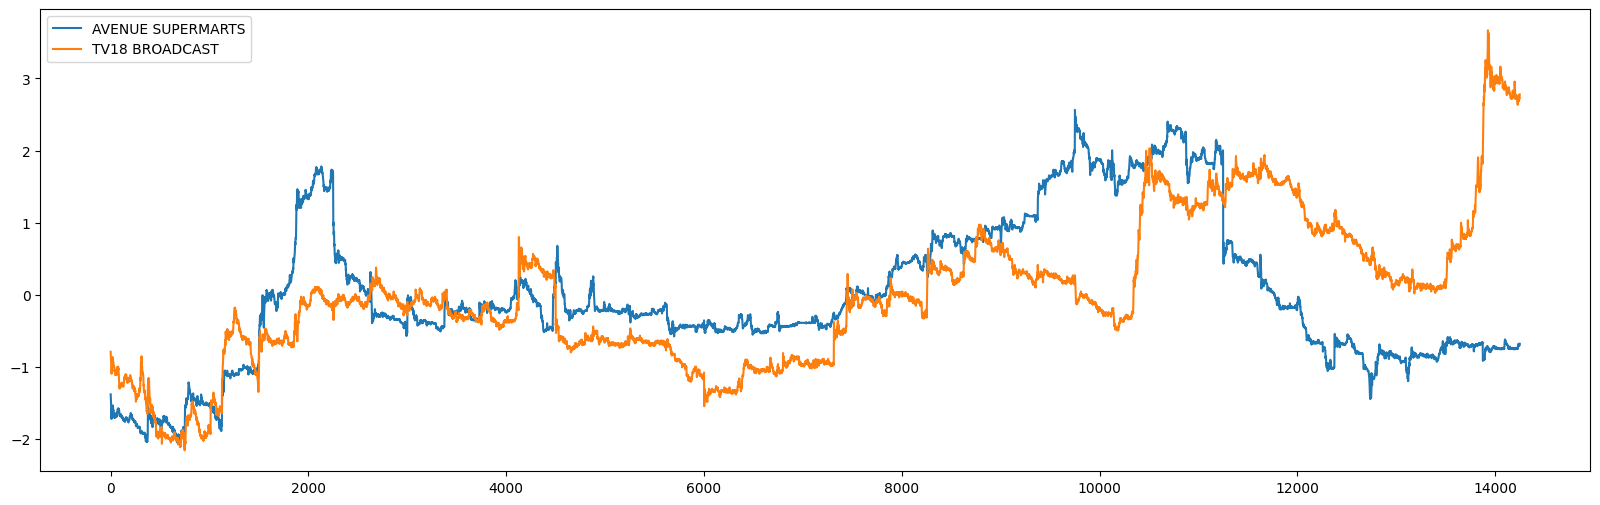

In [ ]:
stock_idx = 8
plt.figure(figsize=(20,6))
for s in common_stock_map[stock_idx]:
    stock_array = df.iloc[:, s+1]
    # normalize by std and mean
    stock_array = (stock_array - stock_array.mean()) / stock_array.std()
    plt.plot(stock_array, label=names[s])
plt.legend();  plt.show()

## Validaion loss analysis

In [ ]:
val_loss_list = {}

for i in [i for i in os.listdir(args.checkpoints) if i.endswith('k50')]:

    weights = os.listdir("{}/{}".format(args.checkpoints, i))
    sorted_weights = sorted(weights, key=lambda x: float(x.replace('checkpoint_','').replace('.pth','')), reverse=True)    
    val_loss_list[int(i[45:].split('_')[0])] = float(sorted_weights[-1].split('_')[-1][:-4])

In [ ]:
# sort validation loss vased on value
s = sorted(val_loss_list.items(), key=lambda x: x[1])

In [ ]:
s

[(145, 0.0003),
 (103, 0.0004),
 (175, 0.0004),
 (30, 0.0006),
 (190, 0.0007),
 (287, 0.0009),
 (267, 0.0009),
 (148, 0.001),
 (326, 0.001),
 (87, 0.001),
 (90, 0.001),
 (28, 0.0011),
 (112, 0.0012),
 (191, 0.0013),
 (173, 0.0014),
 (51, 0.0015),
 (174, 0.0015),
 (232, 0.0016),
 (196, 0.0016),
 (206, 0.0016),
 (91, 0.0017),
 (53, 0.0017),
 (85, 0.0018),
 (237, 0.0018),
 (220, 0.0019),
 (161, 0.0019),
 (361, 0.0021),
 (387, 0.0022),
 (102, 0.0022),
 (96, 0.0022),
 (18, 0.0022),
 (304, 0.0022),
 (384, 0.0022),
 (349, 0.0022),
 (64, 0.0023),
 (88, 0.0025),
 (44, 0.0025),
 (106, 0.0025),
 (260, 0.0025),
 (132, 0.0027),
 (67, 0.0028),
 (157, 0.0028),
 (300, 0.0028),
 (0, 0.0029),
 (99, 0.0029),
 (244, 0.003),
 (150, 0.003),
 (238, 0.0031),
 (29, 0.0032),
 (323, 0.0032),
 (297, 0.0033),
 (143, 0.0033),
 (312, 0.0035),
 (351, 0.0036),
 (224, 0.0037),
 (311, 0.0038),
 (211, 0.0038),
 (38, 0.0038),
 (338, 0.0039),
 (286, 0.004),
 (249, 0.0041),
 (382, 0.0044),
 (117, 0.0044),
 (23, 0.0044),
 (3

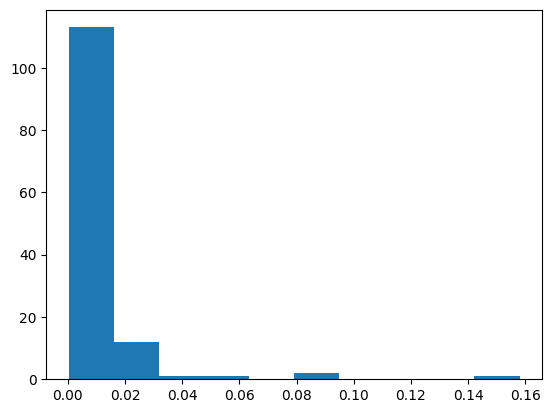

In [ ]:
plt.hist(val_loss_list) ; plt.show()

In [ ]:
sorted(val_loss_list)

[0.0003,
 0.0004,
 0.0004,
 0.0006,
 0.0007,
 0.0009,
 0.0009,
 0.001,
 0.001,
 0.001,
 0.001,
 0.0011,
 0.0012,
 0.0013,
 0.0014,
 0.0015,
 0.0015,
 0.0016,
 0.0016,
 0.0016,
 0.0017,
 0.0017,
 0.0018,
 0.0018,
 0.0019,
 0.0019,
 0.0021,
 0.0022,
 0.0022,
 0.0022,
 0.0022,
 0.0022,
 0.0022,
 0.0022,
 0.0023,
 0.0025,
 0.0025,
 0.0025,
 0.0025,
 0.0027,
 0.0028,
 0.0028,
 0.0028,
 0.0029,
 0.0029,
 0.003,
 0.003,
 0.0031,
 0.0032,
 0.0032,
 0.0033,
 0.0033,
 0.0035,
 0.0036,
 0.0037,
 0.0038,
 0.0038,
 0.0038,
 0.0039,
 0.004,
 0.0041,
 0.0044,
 0.0044,
 0.0044,
 0.0045,
 0.0045,
 0.0045,
 0.0046,
 0.0047,
 0.0047,
 0.0049,
 0.0049,
 0.0051,
 0.0055,
 0.0057,
 0.0058,
 0.0059,
 0.0063,
 0.0064,
 0.0064,
 0.0066,
 0.0067,
 0.0072,
 0.0074,
 0.008,
 0.0083,
 0.0084,
 0.0085,
 0.0086,
 0.0089,
 0.009,
 0.0092,
 0.0094,
 0.0095,
 0.0097,
 0.01,
 0.0103,
 0.0104,
 0.0108,
 0.011,
 0.0111,
 0.0114,
 0.0118,
 0.0122,
 0.0125,
 0.0128,
 0.013,
 0.0131,
 0.0131,
 0.0134,
 0.0147,
 0.015,
 0.016